# 6.2 Exploring Relationships

### This script contains the following:

#### 1. Importing Visualization Libraries and Data
#### 2. Exploring Relationships
     Correlations
     Scatterplots
     Pair Plots
     Categorical Plots
#### 3. Revisiting Key Questions
#### 4. Define Hypothesis

### 1. Importing Visualization Libraries and Data

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [126]:
df_3 = pd.read_csv('/Users/selcenayranci/Desktop/2023 NYC Airbnb Analysis/02.Data/Prepared Data/airbnb_2023_v1.csv')

### 2. Exploring Relationships

### Correlations:

In [127]:
df_3.columns

Index(['ID', 'Name', 'Neighbourhood Group', 'Neighbourhood', 'Latitude',
       'Longitude', 'Room Type', 'Price', 'Min Nights', 'No of Reviews',
       'Last Review', 'Reviews Per Month', 'Calculated Host Listings',
       'Availability', 'No of Reviews LTM'],
      dtype='object')

In [128]:
# Creating a new column to for 'Neighbourhood Group' to transform it to numerical column

result = []
for value in df_3['Neighbourhood Group']:
    if value == 'Manhattan':
        result.append('1')
    elif value == 'Brooklyn':
        result.append('2')
    elif value == 'Queens':
        result.append('3')
    elif value == 'Bronx':
        result.append('4')
    else:
        result.append('5')

df_3['Neighbourhood Group Code'] = result

In [129]:
df_3['Neighbourhood Group'].value_counts(dropna=False)

Neighbourhood Group
Manhattan        17649
Brooklyn         16235
Queens            6916
Bronx             1691
Staten Island      428
Name: count, dtype: int64

In [130]:
df_3['Neighbourhood Group Code'].value_counts(dropna=False)

Neighbourhood Group Code
1    17649
2    16235
3     6916
4     1691
5      428
Name: count, dtype: int64

In [131]:
df_3[['Neighbourhood Group', 'Neighbourhood Group Code']]

,Neighbourhood Group,Neighbourhood Group Code
0,Manhattan,1
1,Brooklyn,2
2,Manhattan,1
3,Manhattan,1
4,Brooklyn,2
...,...,...
42914,Brooklyn,2
42915,Manhattan,1
42916,Brooklyn,2
42917,Staten Island,5


In [132]:
df_3['Room Type'].value_counts(dropna=False)

Room Type
Entire home/apt    24273
Private room       17874
Shared room          575
Hotel room           197
Name: count, dtype: int64

In [133]:
# Creating a new column to for 'Room Type' to transform it to numerical column

result = []
for value in df_3['Room Type']:
    if value == 'Entire home/apt':
        result.append('1')
    elif value == 'Private room':
        result.append('2')
    elif value == 'Shared room':
        result.append('3')
    else:
        result.append('4')

df_3['Room Type Code'] = result

In [134]:
df_3['Room Type Code'].value_counts(dropna=False)

Room Type Code
1    24273
2    17874
3      575
4      197
Name: count, dtype: int64

In [135]:
df_3[['Room Type', 'Room Type Code']]

,Room Type,Room Type Code
0,Entire home/apt,1
1,Private room,2
2,Private room,2
3,Private room,2
4,Entire home/apt,1
...,...,...
42914,Entire home/apt,1
42915,Private room,2
42916,Entire home/apt,1
42917,Entire home/apt,1


In [136]:
df_3.columns

Index(['ID', 'Name', 'Neighbourhood Group', 'Neighbourhood', 'Latitude',
       'Longitude', 'Room Type', 'Price', 'Min Nights', 'No of Reviews',
       'Last Review', 'Reviews Per Month', 'Calculated Host Listings',
       'Availability', 'No of Reviews LTM', 'Neighbourhood Group Code',
       'Room Type Code'],
      dtype='object')

In [137]:
# Creating a subset for the correlation matrix

subset_df_3 = df_3[['Neighbourhood Group Code', 'Room Type Code', 'Price', 
                    'Min Nights', 'No of Reviews', 'Availability', 'Reviews Per Month', 
                    'Calculated Host Listings', 'No of Reviews LTM']]

In [138]:
subset_df_3.corr()

,Neighbourhood Group Code,Room Type Code,Price,Min Nights,No of Reviews,Availability,Reviews Per Month,Calculated Host Listings,No of Reviews LTM
Neighbourhood Group Code,1.000000,0.106293,-0.149612,-0.109412,0.055237,0.124476,0.116157,-0.107782,0.083590
Room Type Code,0.106293,1.000000,-0.155763,-0.018702,-0.007794,-0.007017,-0.035377,0.006793,-0.027325
Price,-0.149612,-0.155763,1.000000,-0.041890,-0.040773,0.069636,-0.038041,0.075596,-0.029649
Min Nights,-0.109412,-0.018702,-0.041890,1.000000,-0.150740,-0.100617,-0.262510,0.133377,-0.236161
No of Reviews,0.055237,-0.007794,-0.040773,-0.150740,1.000000,0.046190,0.610933,-0.111167,0.652959
Availability,0.124476,-0.007017,0.069636,-0.100617,0.046190,1.000000,0.138461,0.126457,0.122701
Reviews Per Month,0.116157,-0.035377,-0.038041,-0.262510,0.610933,0.138461,1.000000,-0.122159,0.858606
Calculated Host Listings,-0.107782,0.006793,0.075596,0.133377,-0.111167,0.126457,-0.122159,1.000000,-0.097351
No of Reviews LTM,0.083590,-0.027325,-0.029649,-0.236161,0.652959,0.122701,0.858606,-0.097351,1.000000


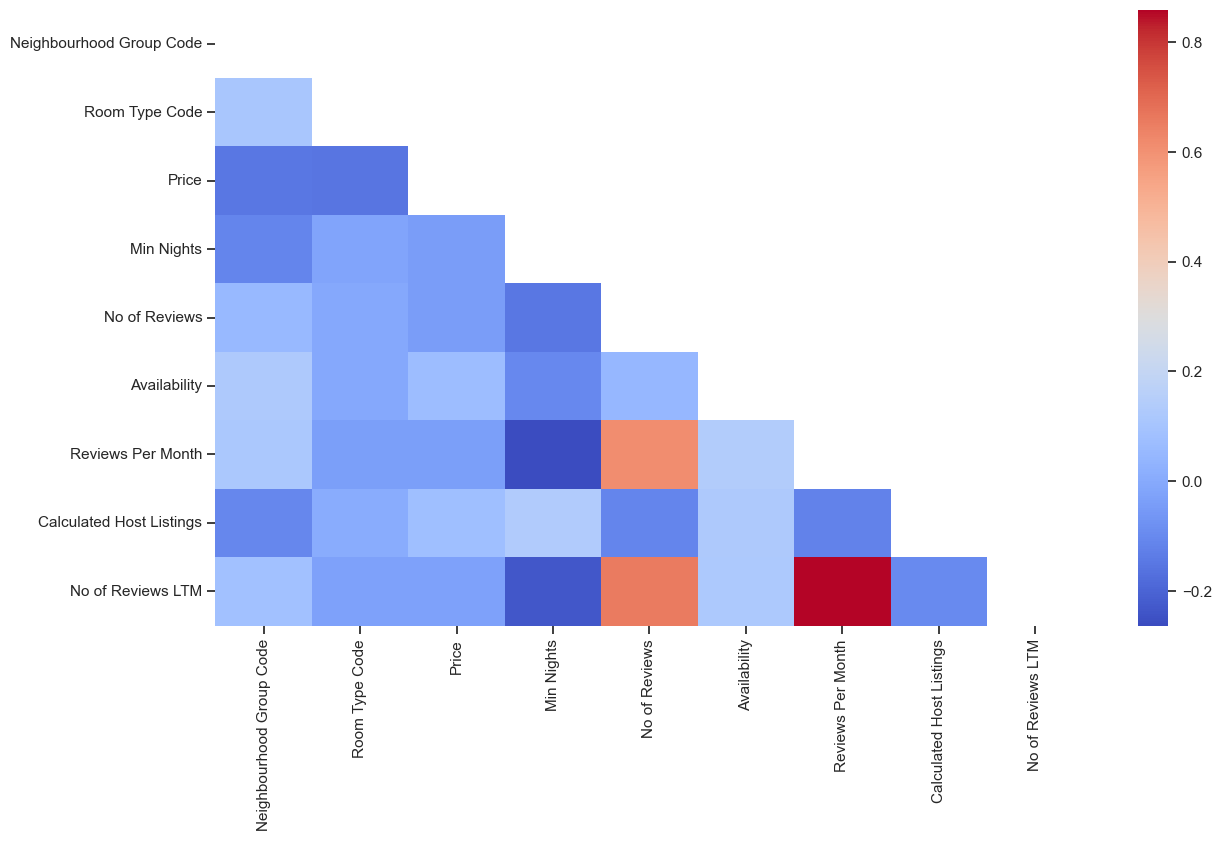

In [139]:
# Creating a correlation heatmap 

# Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(14,8))

mask = np.triu(np.ones_like(subset_df_3.corr(), dtype=bool))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr = sns.heatmap(subset_df_3.corr(), annot = True, mask = mask, cmap='coolwarm', ax = ax)

In [268]:
# Saving the figure

corr.figure.savefig('/Users/selcenayranci/Desktop/2023 NYC Airbnb Analysis/04.Analysis/Visualisations/corr.png', bbox_inches='tight')

#### Interpreting the results of the heatmap

Neighbourhood Group Code and Availability Code have a weak positive correlation (0.124) and weak negative correlation with Min Nights (-0.109), meaning that some neighbourhoods have more availability and certain neighbourhoods tend to require horter minimum nights stays. 

Price has a weak negative correlation with Neighbourhood Group Code (-0.150) and Room Type Code (-0.156), meaning higher prices tend to be associated with certain neighbourhood groups or room types.

Min Nights have a moderate negative correlation with Reviews Per Month (-0.262) and No of Reviews LTM (-0.236), meaning listing with shorter minimum nights stays tend to receive more and frequent reviews.

No of Reviews have a strong positive correlation with Reviews Per Month (0.611) and No of Reviews LTM (0.652), meaning that listings with more reviews usually have more reviews per month and more frequent reviews.

Availability and Reviews Per Month have a moderate positive correlation (0.138), meaning listings with higher availability usually receive more reviews per month.

No of Reviews LTM and Reviews Per Month have a very strong positive correlation (0.859), meaning a strong relationship between the number of reviews in the last twelve months and the average reviews per month.

### Scatterplots:

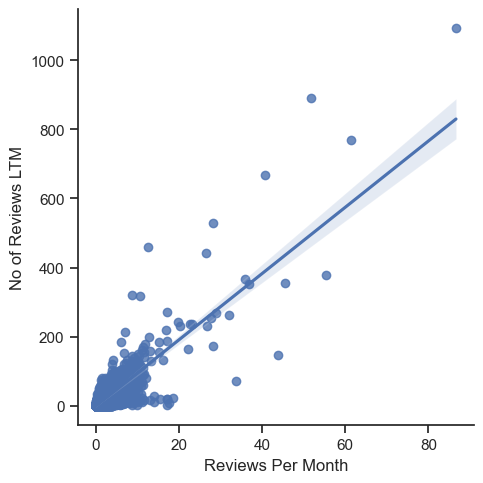

In [269]:
# Create a scatterplot for the "Min Nights " and "Reviews Per Month" columns in seaborn

scatter = sns.lmplot(x = 'Reviews Per Month', y = 'No of Reviews LTM', data = subset_df_3)

#### Interpreting the results of the scatterplot

In the scatterplot, we can see the strong positive relationship with a very steep trend line. Most of the points have clustered around 20 Reviews Per Month to 200 Reviews LTM. The points after this are moving further away from the trend line and show greater variability. There seems to be an upward trend when the reviews per month hits 20. Therefore we can expect that listings that have more reviews per month would also have more frequentl reviews recently. But it's not always the case as we see dots for example that has around 35 reviews per month but less than 200 reviews recently. So we can say that this scatterplot that shows the relationship between “No of Reviews Per Month” and “No of Reviews LTM” isn’t purely linear meaning that it doesn’t only trend in a single direction.

In [270]:
# Saving the figure

scatter.figure.savefig('/Users/selcenayranci/Desktop/2023 NYC Airbnb Analysis/04.Analysis/Visualisations/scatter.png', bbox_inches='tight')

### Pair Plots:

In [141]:
df_3.columns

Index(['ID', 'Name', 'Neighbourhood Group', 'Neighbourhood', 'Latitude',
       'Longitude', 'Room Type', 'Price', 'Min Nights', 'No of Reviews',
       'Last Review', 'Reviews Per Month', 'Calculated Host Listings',
       'Availability', 'No of Reviews LTM', 'Neighbourhood Group Code',
       'Room Type Code'],
      dtype='object')

In [142]:
# Creating a subset for for the pair plots

sub_2_df_3 = subset_df_3[['Price', 'Min Nights', 'No of Reviews', 'Reviews Per Month', 
                          'Calculated Host Listings','Availability', 'No of Reviews LTM']]

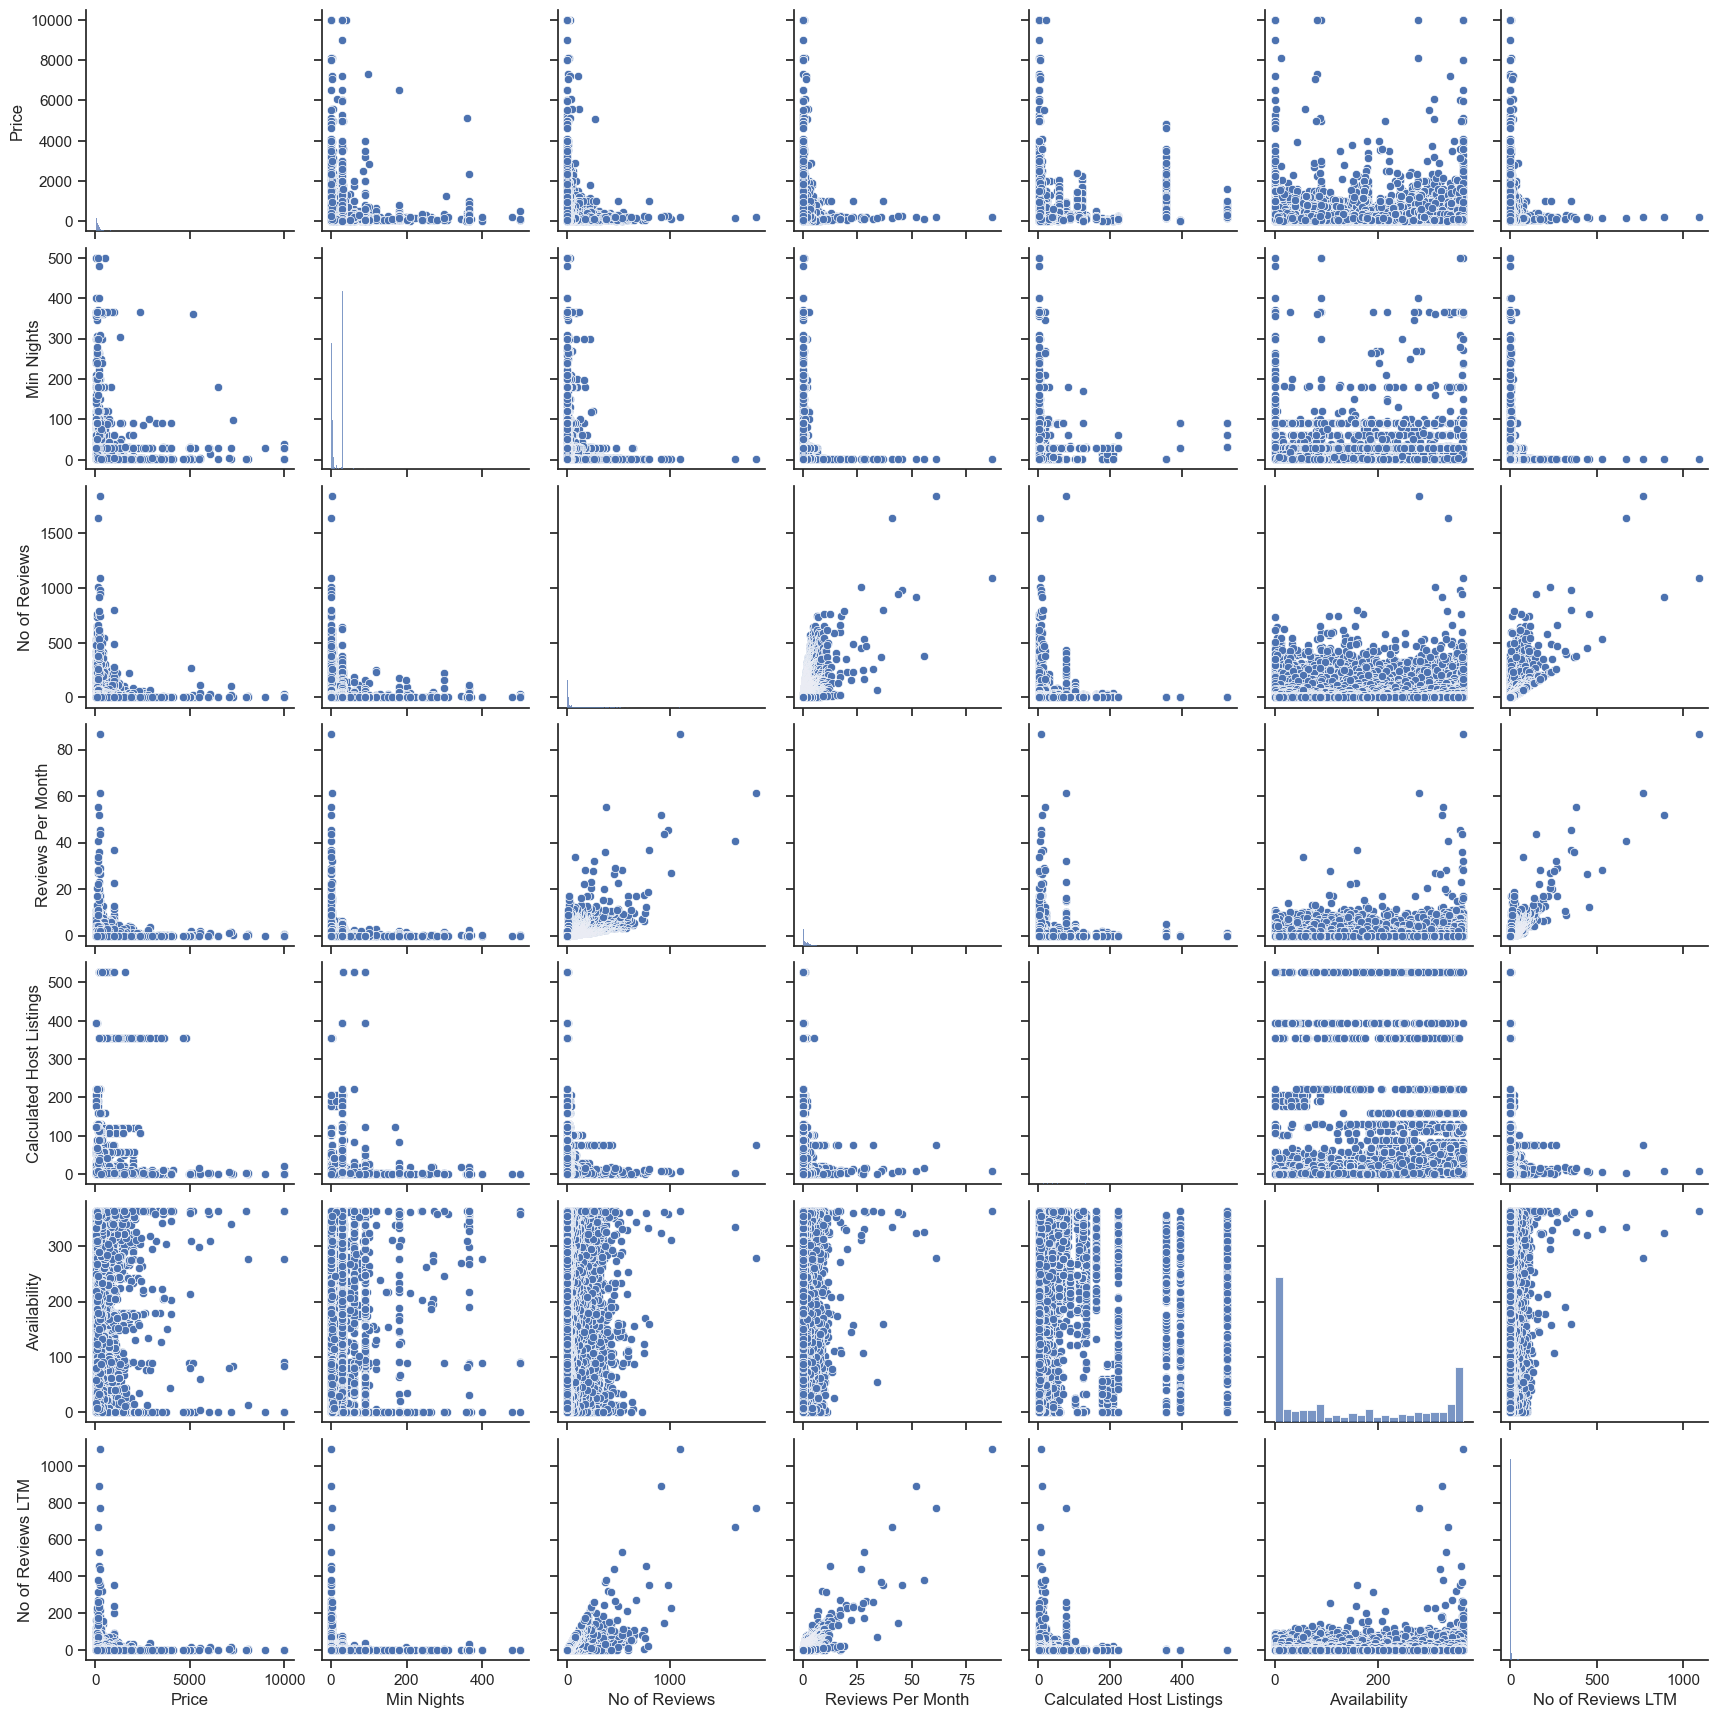

In [143]:
pairplot = sns.pairplot(sub_2_df_3)

#### Interpreting the results of the pairplots

Price column has a colse relationship with Min Nights: The prices tend to be higher if the required min stay is shorter. Price column also has close relationship with No of Reviews and Reviews per Month and No of Reviews LTM: Higher the prices, the more the reviews and more frequent. We didn't have these insightsfrom the heatmap previously.

In [272]:
# Saving figure

pairplot.figure.savefig('/Users/selcenayranci/Desktop/2023 NYC Airbnb Analysis/04.Analysis/Visualisations/pairplot.png', bbox_inches='tight')

### Categorical Plots:

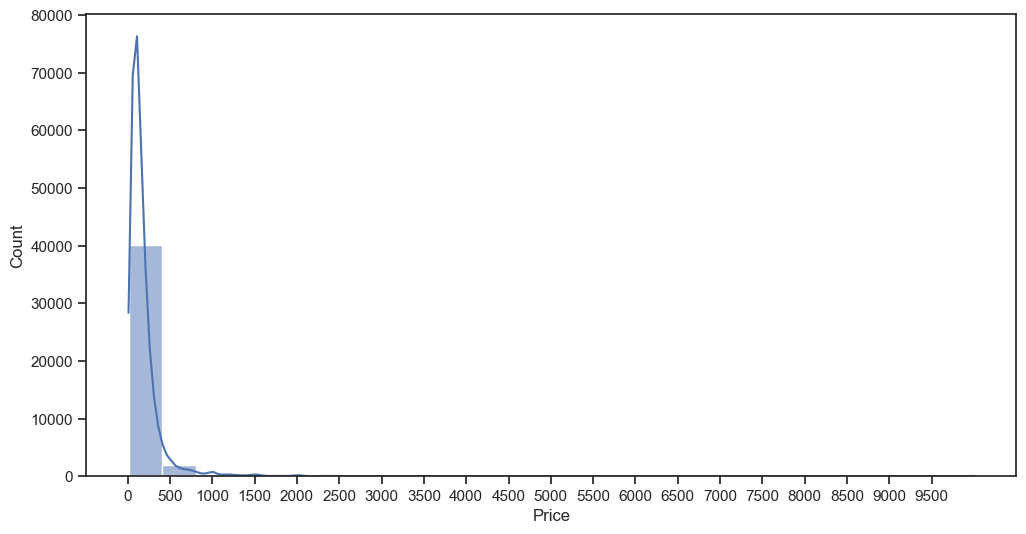

In [241]:
plt.figure(figsize=(12, 6))
sns.histplot(df_3['Price'], bins=25, kde=True) 
plt.xticks(np.arange(0, 10000, 500)) 
plt.show()

In [242]:
# Creating a Price category

df_3.loc[df_3['Price'] < 500, 'Price category'] = 'Low Price'
df_3.loc[(df_3['Price'] >= 500) & (df_3['Price'] < 2000) , 'Price category'] = 'Mid Price'
df_3.loc[df_3['Price'] >= 2000, 'Price category'] = 'High Price'

In [243]:
df_3['Price category'].value_counts(dropna=False)

Price category
Low Price     40812
Mid Price      1914
High Price      193
Name: count, dtype: int64

In [197]:
df_3.columns

Index(['ID', 'Name', 'Neighbourhood Group', 'Neighbourhood', 'Latitude',
       'Longitude', 'Room Type', 'Price', 'Min Nights', 'No of Reviews',
       'Last Review', 'Reviews Per Month', 'Calculated Host Listings',
       'Availability', 'No of Reviews LTM', 'Neighbourhood Group Code',
       'Room Type Code', 'Price category'],
      dtype='object')

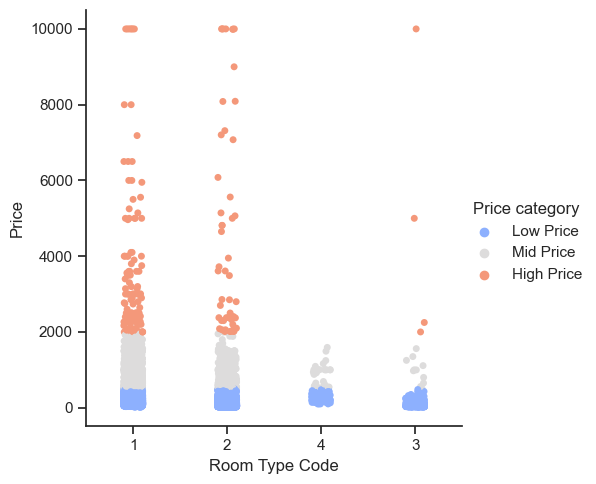

In [245]:
# Create a categorical plot in seaborn using the price categories created above

catplot = sns.set(style='ticks')
sns.catplot(data=df_3, x='Room Type Code', y='Price', 
            hue='Price category', hue_order=['Low Price', 'Mid Price', 'High Price'], 
            palette='coolwarm')

#### Interpreting the results of the categorical plot

'1 = Entire home/apt', '2 = Private room', '3 = Shared room', '4 = Hotel room'

From this catplot we can see that except Hotel Rooms, all the other three room types have options for different price ranges. Most of the higer price range room types are almost exclusively for Entire home/apts and Private rooms which can be expected as these types of accommodations offer more space, privacy, and amenities compared to shared rooms, hence they can justify higher price points. I was quite surprised that none of the hotel rooms have higher prices. On the other hand, on Airbnb usually private homes/rooms are advertised (hence they have higher numbers of listings). On the contrary hotel rooms have quite low number of listings as it can be quite new to have more public places and they might be keeping the proces lower to compete with the already big selection of offerings from private homes. Finally for shared rooms, there are only handful of listings that are in higher price range.

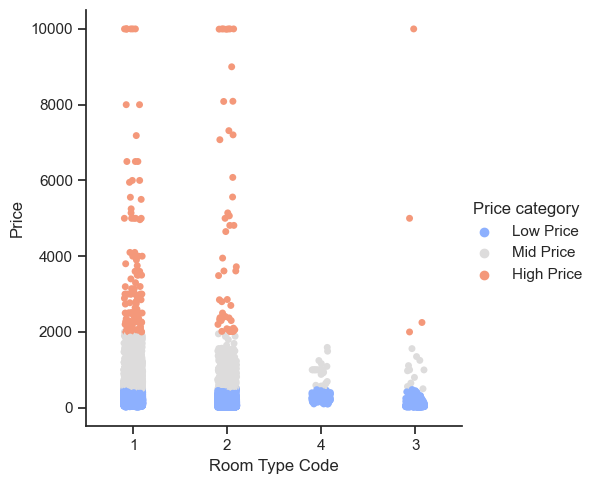

In [263]:
# Saving the figure

catplot = sns.set(style='ticks')
sns.catplot(data=df_3, x='Room Type Code', y='Price', 
            hue='Price category', hue_order=['Low Price', 'Mid Price', 'High Price'], 
            palette='coolwarm')
catplot = plt.savefig('/Users/selcenayranci/Desktop/2023 NYC Airbnb Analysis/04.Analysis/Visualisations/catplot.png') 

In [273]:
# Exporting the dataframe

df_3.to_csv('/Users/selcenayranci/Desktop/2023 NYC Airbnb Analysis/02.Data/Prepared Data/airbnb_2023_v2.csv', index=False)

### 3. Revisiting Key Questions

1. Are there certain room types that exist in certain neighbourhoods/neighbourhood group?
2. What is the average price of a room per neighborhood/neighbourhood group?
   - Correlation matrix showed that higher prices tend to be associated with certain neighbourhood groups or room types.
3. What is the average price of a room per room type?
   - Categorical plot showed the distribution of the prices of different room types.
4. What is the number of listings per neighbourhood/neighbourhood groups?
5. What is the geographical distribution of listings by neighbourhood group?
6. What is the distribution of room types?
   - We already know that (also uspported byt the categorical plot) number of listings are dominated by entire home/apts followed by
     private rooms. Shared room and hotel rooms take the smallest share of the listings.
7. What percentage of rooms are available?
   - Based on the correlation matrix, we see that some neighbourhoods have more availability but it needs to be analyzed further

I didn't consider much about the correlation with the reviews but the analysis showed some interesting insights to be analyzed further.

### Developing Hypothesis

1. The more listings there are in a neighbourhood, the higher the average prices of the listings will be.
2. The listings that have more reviews also have higher prices.
3. The less available a listing is, higher its price will be.